In [4]:
##This code was all written by ChatGPT on 9/11/23

import numpy as np
from scipy.optimize import minimize

# Objective function to minimize
def objective_function(f, c, F, m, alpha, upper, lower):
    inner_product = np.dot(c, f)
    
    # Check for invalid values
    if inner_product - F <= 0:
        return np.inf
    
    term1 = 20 * m * np.log(inner_product - F)
    
    # Check for invalid values
    if (upper - f <= 0).any() or (f - lower <= 0).any():
        return np.inf
    
    term2 = np.sum((upper - f) ** (-alpha) + (f - lower) ** (-alpha))
    
    return term1 + term2

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda f: f - lower},
               {'type': 'ineq', 'fun': lambda f: upper - f})

# Initial guess for f
initial_f = np.array([1.0, 2.0, 3.0])

# Constants
c = np.array([1.0, 2.0, 3.0])
F = 10.0
m = len(c)

upper = np.array([5.0, 6.0, 7.0])
lower = np.array([0.0, 1.0, 2.0])
alpha = 0.001/(np.log(m * np.max(upper)))

# Optimize the objective function
result = minimize(objective_function, initial_f, args=(c, F, m, alpha, upper, lower),
                  constraints=constraints, method='SLSQP')

if result.success:
    optimal_f = result.x
    optimal_objective_value = result.fun
    print("Optimal f:", optimal_f)
    print("Optimal Objective Value:", optimal_objective_value)
else:
    print("Optimization did not converge to an optimal solution.")


Optimal f: [0.33775816 1.33771208 2.337666  ]
Optimal Objective Value: -212.565299739053


In [49]:
import time
from tqdm import tqdm

def test_ipm(n):
    avg_times = []
    bounds = []
    num_trials = 100
    for i in tqdm(range(4, n)):
        avg_time = 0
        bounds.append(i * np.log(i) * np.exp(-np.log(np.log(i)) * np.log(i) ** 0.875))
        for trial in range(num_trials):
            U = np.random.randint(50, 100)
            c = np.random.randint(1, U, size = i).astype(float)
            initial_f = c
            F = float(np.random.randint(1, U))
            m = len(c)
            
            upper = initial_f + np.random.randint(1, U)
            lower = initial_f - np.random.randint(1, U)
            alpha = 0.001/(np.log(m * np.max(upper)))
            constraints = ({'type': 'ineq', 'fun': lambda f: f - lower},
               {'type': 'ineq', 'fun': lambda f: upper - f})
            start = time.time()

            result = minimize(objective_function, initial_f, args=(c, F, m, alpha, upper, lower),
                      constraints=constraints, method='SLSQP')

            end = time.time()
            duration = end - start
            avg_time += duration
        avg_times.append(avg_time/num_trials)
    return avg_times, bounds
        

In [51]:
avg_times, bounds = test_ipm(100)

100%|██████████| 96/96 [19:54<00:00, 12.44s/it]


In [ ]:
new_bounds 

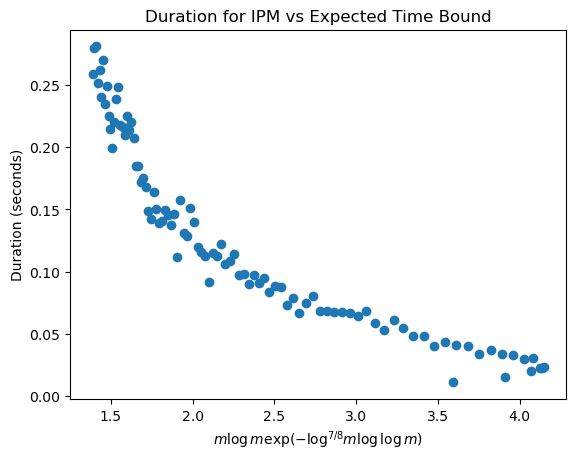

In [88]:
import matplotlib.pyplot as plt
plt.scatter(bounds, avg_times)
plt.ylabel('Duration (seconds)')
plt.xlabel(r'$m \log m \exp(-\log^{7/8} m \log \log m)$')
plt.title('Duration for IPM vs Expected Time Bound')
plt.show()

In [53]:
avg_times

[0.010960826873779297,
 0.015186805725097657,
 0.02012305736541748,
 0.022275660037994385,
 0.023585929870605468,
 0.02274723768234253,
 0.030211870670318604,
 0.02962350606918335,
 0.032572908401489256,
 0.03372887134552002,
 0.03666836261749268,
 0.03361757278442383,
 0.04047018051147461,
 0.04075161218643188,
 0.043002262115478515,
 0.0399208664894104,
 0.04811678886413574,
 0.0480875563621521,
 0.05459063768386841,
 0.06066704034805298,
 0.05288098096847534,
 0.05856000900268555,
 0.06790712118148803,
 0.06433520793914795,
 0.06705442428588868,
 0.06716067552566528,
 0.06731732845306397,
 0.06864829778671265,
 0.06836450099945068,
 0.08032140254974365,
 0.07440772294998169,
 0.06668335199356079,
 0.07847617387771606,
 0.07328674077987671,
 0.0878317928314209,
 0.08829801559448242,
 0.08372705698013305,
 0.09458656311035156,
 0.09090993881225586,
 0.09720373153686523,
 0.09005081653594971,
 0.09823115348815918,
 0.09714884281158448,
 0.11443866729736328,
 0.1086704182624817,
 0.1058

In [55]:
bounds

[3.5902900952619623,
 3.9104302624125116,
 4.069308773487755,
 4.1355836804871755,
 4.146701888442454,
 4.1241738412521896,
 4.080895624570696,
 4.024867284117746,
 3.9611860437836053,
 3.893166294492321,
 3.8229947936237996,
 3.7521273875658,
 3.68153642042374,
 3.611868992379437,
 3.543550433676304,
 3.47685325221561,
 3.4119438332115672,
 3.3489145189183467,
 3.2878059127738855,
 3.2286225456449773,
 3.1713439726984314,
 3.115932686456932,
 3.062339787554085,
 3.0105090613256387,
 2.9603799116824474,
 2.911889470066111,
 2.864974105363174,
 2.819570496711537,
 2.7756163861953334,
 2.733051096543916,
 2.691815876136276,
 2.6518541171564243,
 2.6131114807889535,
 2.5755359545998697,
 2.53907786081408,
 2.503689829441699,
 2.4693267466678,
 2.4359456862795597,
 2.40350582992628,
 2.371968380520975,
 2.3412964719720315,
 2.3114550775880964,
 2.282410918860505,
 2.2541323758448972,
 2.226589399998873,
 2.1997534300576804,
 2.1735973113230234,
 2.1480952185854045,
 2.123222582785193,
 2.0

In [86]:
k = float(1000)
k * np.log(k) * np.exp(-np.log(k)**0.875 * np.log(np.log(k)))

0.19307385083845463

In [81]:
def f(m):
    return 1 + np.log(np.log(m))/np.log(m) - np.log(np.log(m))/np.log(m)**0.125

In [83]:
m = np.exp(100)
np.log(np.log(m))/np.log(m)**0.125

2.5896775051156298

In [76]:
np.log(2.1491*10**11)

26.093485172783527

In [79]:
np.log(3*10**10)

24.124463218608568

In [80]:
(3*10**10)**0.125

20.400469235504897

In [84]:
f(m)

-1.5436258032557488